## **Interpretable Machine Learning**

## **Load data to use**

In [1]:
import pandas as pd
from sklearn import datasets
wine_data = datasets.load_wine()
df_wine = pd.DataFrame(wine_data.data,columns=wine_data.feature_names)
df_wine['target'] = pd.Series(wine_data.target)

/Users/erikapat/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:17: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping, defaultdict


## **MODELO**

In [5]:
from sklearn.model_selection import train_test_split
X = df_wine.drop(['target'], axis=1)
y = df_wine['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

## **ELI5**

**ELI5** is a visualisation library that is useful for debugging machine learning models and explaining the predictions they have produced. It works with the most common python machine learning libraries including scikit-learn, XGBoost and Keras.

Let’s use ELI5 to inspect the feature importance for the model we trained above.

In [6]:
#!pip install eli5

By default the show_weights method uses gain to calculate the weight but you can specify other types by adding the importance_type argument.

In [7]:
import eli5
eli5.show_weights(model, feature_names = X.columns.tolist())

Weight,Feature
0.2174 ± 0.3602,flavanoids
0.1837 ± 0.3344,proline
0.1734 ± 0.3128,color_intensity
0.1003 ± 0.2605,total_phenols
0.0871 ± 0.2430,hue
0.0820 ± 0.2213,alcohol
0.0454 ± 0.1354,proanthocyanins
0.0376 ± 0.1017,od280/od315_of_diluted_wines
0.0317 ± 0.1201,alcalinity_of_ash
0.0179 ± 0.0559,malic_acid


You can also use show_prediction to inspect the reasons for individual predictions.

In [8]:
from eli5 import show_prediction
show_prediction(model, X_train.iloc[1], feature_names = X.columns.tolist(), 
                show_feature_values=True)

## **MLxtend**

Let’s use MLxtend to compare the decision boundaries for a voting classifier against its constituent classifiers.

In [11]:
#!pip install mlxtend

In [18]:
import matplotlib.pyplot as plt

In [19]:
from mlxtend.plotting import plot_decision_regions
from mlxtend.classifier import EnsembleVoteClassifier
import matplotlib.gridspec as gridspec
import itertools 
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

X_train_ml = X_train[['proline', 'color_intensity']].values
y_train_ml = y_train.values

/Users/erikapat/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.


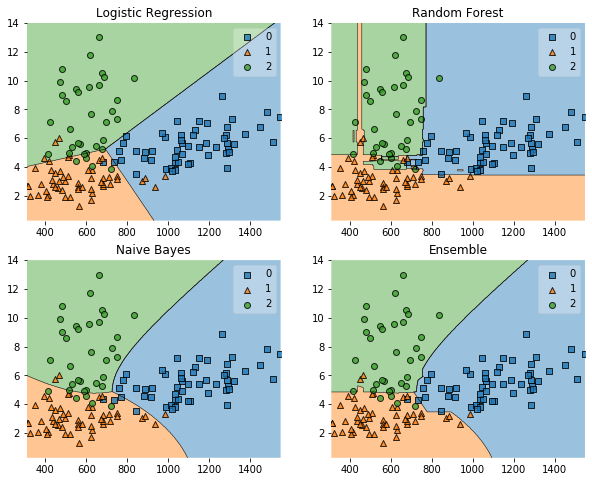

In [20]:
clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
eclf = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3], weights=[1,1,1])
value=1.5
width=0.75
gs = gridspec.GridSpec(2,2)
fig = plt.figure(figsize=(10,8))
labels = ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'Ensemble']
for clf, lab, grd in zip([clf1, clf2, clf3, eclf],
                         labels,
                         itertools.product([0, 1], repeat=2)):
                         
    clf.fit(X_train_ml, y_train_ml)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train_ml, y=y_train_ml, clf=clf)
    plt.title(lab)

## **REFERENCES**
* ["Python Libraries for Interpretable Machine Learning"](https://www.kdnuggets.com/2019/09/python-libraries-interpretable-machine-learning.html)